# OpenCV Library


Estimated time needed: **60** minutes


<h2>Objectives</h2>


Image processing and computer vision tasks include displaying, cropping, flipping, rotating,  image segmentation, classification, image restoration,  image recognition, image generation.  Also, working with images via the cloud requires storing and transmitting, and gathering images through the internet. 
Python is an excellent choice as it has many image processing tools, computer vision, and artificial intelligence libraries. Finally, it has many libraries for working with files in the cloud and the internet.
A digital image is simply a file on your computer. In this lab, you will gain an understanding  of these files and learn to work with these files with some popular libraries


<ul>
    <li><a href='#PIL'>Open CV </a>
        <ul>
            <li>Image Files and Paths  </li>
            <li>Load in Image in Python</li>
            <li>Plotting an Image </li>
            <li>Gray Scale Images, Quantization and Color Channels  </li>
            <li>Gray Scale Images, Quantization and Color Channels  </li>
        </ul>
    </li>
    
</ul>


----


Download the image for the lab:


In [43]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png -O lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png -O barbara.png  

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


'wget' is not recognized as an internal or external command,
operable program or batch file.


First, let's define a helper function to concatenate two images side-by-side. You will need to understand this code this moment, but this function will be used repeatedly in this tutorial to showcase the results.


In [44]:
from PIL import Image          # Import Image từ thư viện Pillow

def get_concat_h(im1, im2):    # Hàm ghép 2 ảnh theo chiều ngang
    #https://note.nkmk.me/en/python-pillow-concat-images/
    dst = Image.new(           # Tạo ảnh mới rỗng
        'RGB',                 # Chế độ màu RGB
        (im1.width + im2.width,# Rộng = tổng chiều rộng 2 ảnh
         im1.height)           # Cao = chiều cao ảnh 1
    )
    dst.paste(im1, (0, 0))     # Dán ảnh 1 vào bên trái
    dst.paste(im2, (im1.width, 0))  # Dán ảnh 2 vào bên phải
    return dst                 # Trả về ảnh đã ghép


## Image Files and Paths  


An image is stored as a file on your computer. Below, we define `my_image` as the filename of a file in this directory.


In [45]:
my_image = "lenna.png"

Filename consists of two parts, the name of the file and the extension, separated by a full stop (`.`). The extension specifies the format of the image. There are two popular image formats -- Joint Photographic Expert Group image (or `.jpg`, `.jpeg`) and Portable Network Graphics (or `.png`). These file types make it simpler to work with images. For example, it compresses the image using sine/cosine approximations, taking less spaces on your drive to store the image.


Image files are stored in the file system of your computer. The location of it is specified using a "path", which is often unique. You can find the path of your current working directory with Python's `os` module. The `os` module provides functions to interact with the file system, e.g. creating or removing a directory (folder), listing its contents, changing and identifying the current working directory. 


In [46]:
import os              # Import thư viện os để làm việc với hệ điều hành
cwd = os.getcwd()      # Lấy thư mục làm việc hiện tại (current working directory)
cwd                    # In ra / trả về đường dẫn thư mục hiện tại


'c:\\Users\\User\\Downloads\\CV_0101'

The "path" to an image can be found using the following line of code.


In [47]:
# image_path = os.path.join(cwd, my_image)
image_path = "lenna.png"   # Gán trực tiếp tên file ảnh vào biến image_path
image_path                # Trả về / in ra giá trị của image_path


'lenna.png'

## Load in Image in Python


OpenCV is a library used for computer vision. It has more functionality than the `PIL` library but is more difficult to use. We can import `OpenCV` as follows:


In [48]:
import cv2

The <code>imread()</code> method loads an image from the specified file, the input is the <code>path</code> of the image to be read (just like PIL), the <code>flag</code> paramter specifies how the image should be read, and the default value is <code>cv2.IMREAD_COLOR</code>.


In [49]:
image = cv2.imread(my_image)

The result is a numpy array with intensity values as 8-bit unsigned integers. 


In [50]:
type(image)

numpy.ndarray

We can get the shape of the array from the `shape` attribute.


In [51]:
image.shape

(225, 225, 3)

The shape is the same as the PIL array, but there are several differences; for example, PIL returns in (R, G, B) format whereas OpenCV returns in (B, G, R) format.


Each pixel could take on 256 possible values as intensity, ranging from 0 to 255, with 0 being the lowest intensity and 255 being the highest. The maximum and minimum intensity values of an image can be obtained, respectively, by calling:


In [52]:
image.max()

np.uint8(255)

and


In [53]:
image.min()

np.uint8(0)

##  Plotting an Image 


You can use OpenCV's `imshow` function to open the image in a new window, but this may give you some issues in Jupyter:


In [54]:
#cv2.imshow('image', imgage)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

You can also use the `imshow` function from the `matplotlib` library:


In [55]:
import matplotlib.pyplot as plt

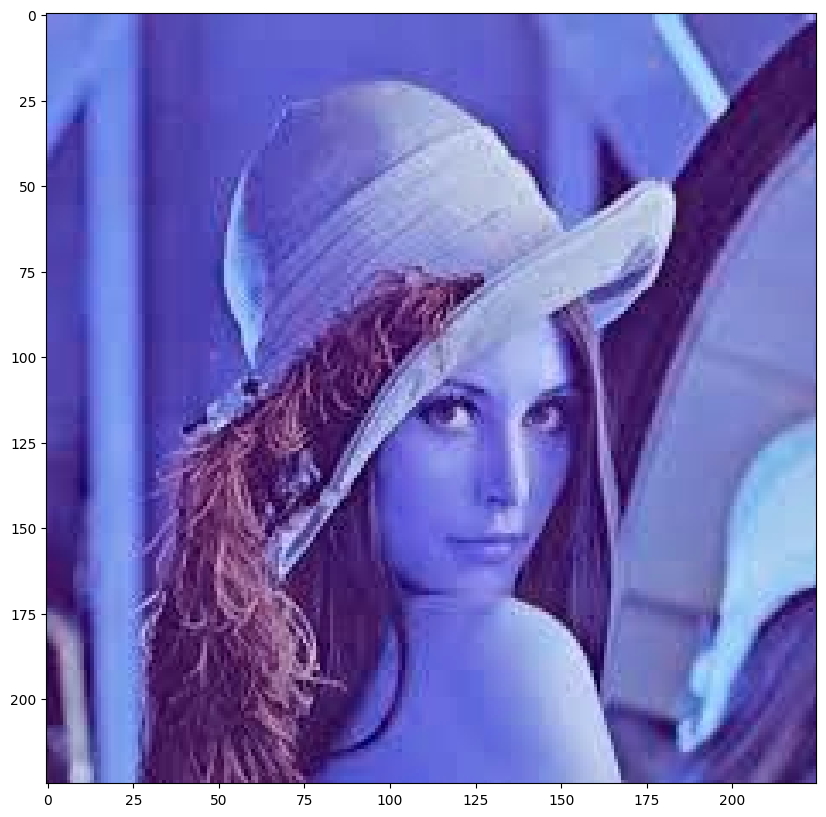

In [56]:
plt.figure(figsize=(10,10))   # Tạo khung hiển thị kích thước 10x10
plt.imshow(image)             # Hiển thị ảnh image
plt.show()                    # Hiển thị ảnh ra màn hình


The image output doesn't look natural. This is because the order of RGB Channels are different. We can change the color space with conversion code and the function `cvtColor` from the `cv2` library:


In [57]:
new_image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

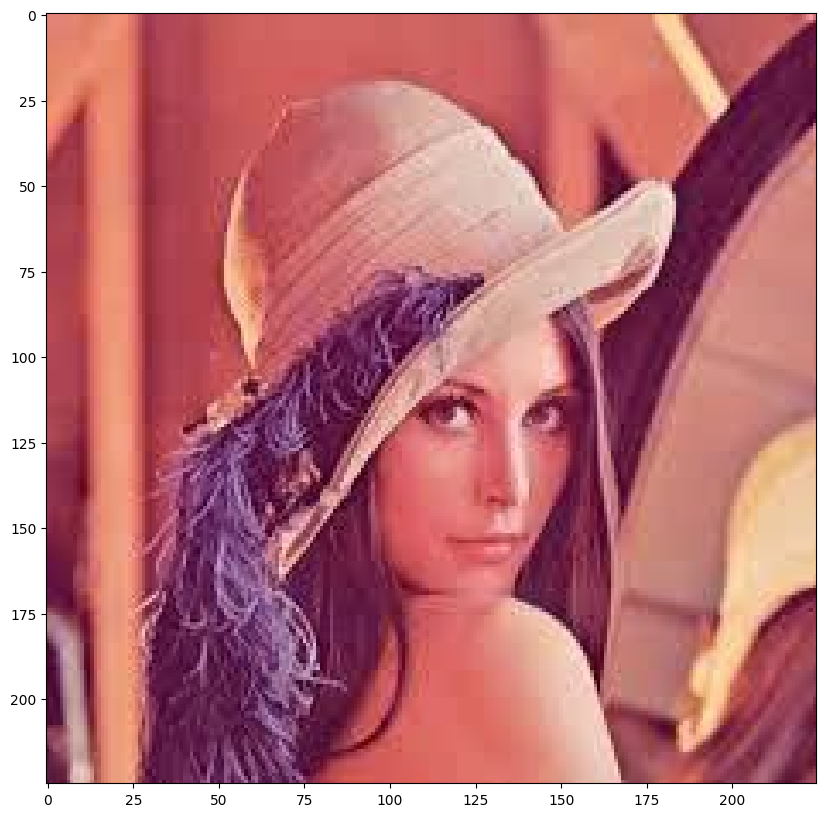

In [58]:
plt.figure(figsize=(10,10))   # Tạo khung hiển thị kích thước 10x10
plt.imshow(new_image)         # Hiển thị ảnh new_image
plt.show()                    # Hiển thị ảnh ra màn hình


You can also load the image using its path, this comes in handy if the image is not in your working directory:


In [59]:
image = cv2.imread(image_path)   # Đọc ảnh bằng OpenCV (ảnh ở dạng BGR)
image.shape                      # Lấy kích thước mảng ảnh


(225, 225, 3)

You can save the image as in `jpg` format.


In [60]:
cv2.imwrite("lenna.jpg", image)   # Lưu ảnh image thành file lenna.jpg


True

### Grayscale Images


Grayscale images have pixel values representing the amount of light or intensity. Light shades of gray have a high-intensity darker shades have a lower intensity. White has the highest intensity, and black the lowest. We can convert an image to Gray Scale using a color conversion code and the function <code>cvtColor</code>.


The code for RGB to gray is <code>cv2.COLOR_BGR2GRAY</code>, we apply the function:


In [61]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

The image array has only two dimensions, i.e. only one color channel:


In [62]:
image_gray.shape

(225, 225)

We can plot the image using `imshow` but we have to specify the color map is gray:


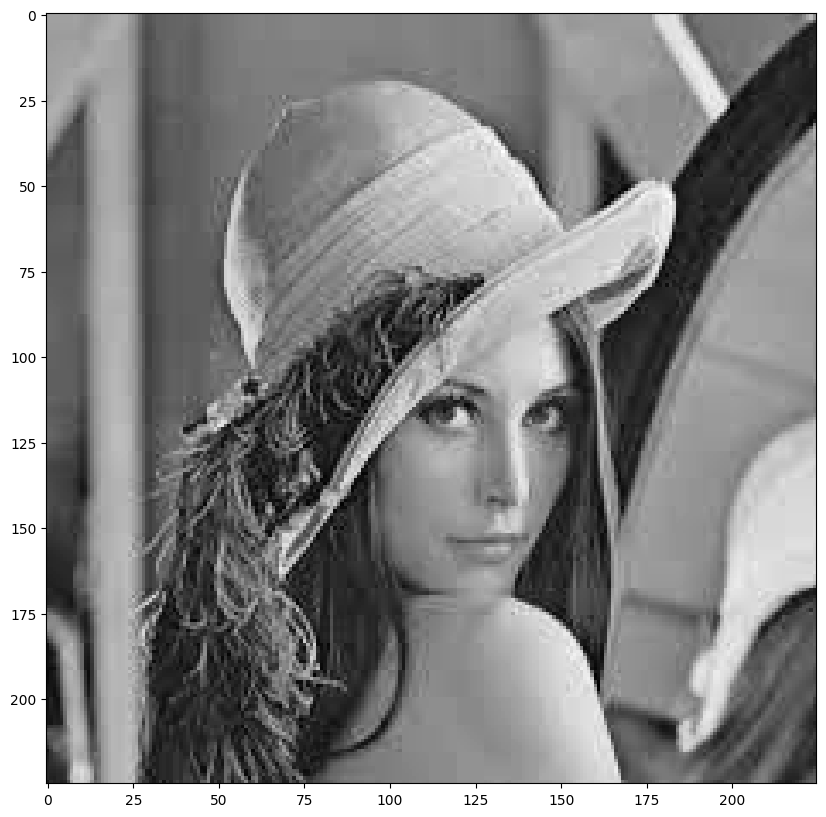

In [63]:
plt.figure(figsize=(10, 10))        # Tạo khung hiển thị kích thước 10x10
plt.imshow(image_gray, cmap='gray') # Hiển thị ảnh xám (grayscale)
plt.show()                          # Hiển thị ảnh ra màn hình


We can save the image as a grayscale image, let's save it as a `jpg` as well, in the working directory.


In [64]:
cv2.imwrite('lena_gray_cv.jpg', image_gray)

True

You can also load in a grayscale image we have to set <code>flag</code> parameter to gray color conversation code: <code>cv2.COLOR_BGR2GRAY</code>:


In [65]:
im_gray = cv2.imread('barbara.png', cv2.IMREAD_GRAYSCALE)

We can plot the image:


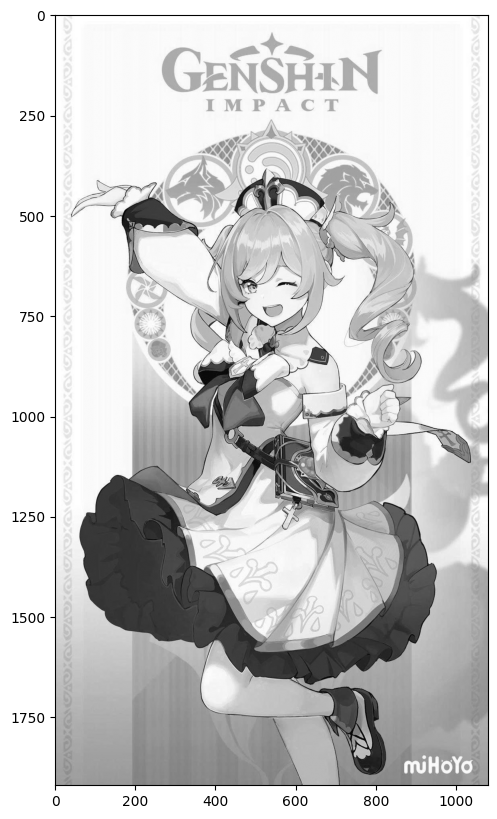

In [66]:
plt.figure(figsize=(10,10))     # Tạo khung hiển thị kích thước 10x10
plt.imshow(im_gray, cmap='gray')# Hiển thị ảnh xám (grayscale)
plt.show()                      # Hiển thị ảnh ra màn hình


### Color Channels  


We can also work with the different color channels. Consider the following image:


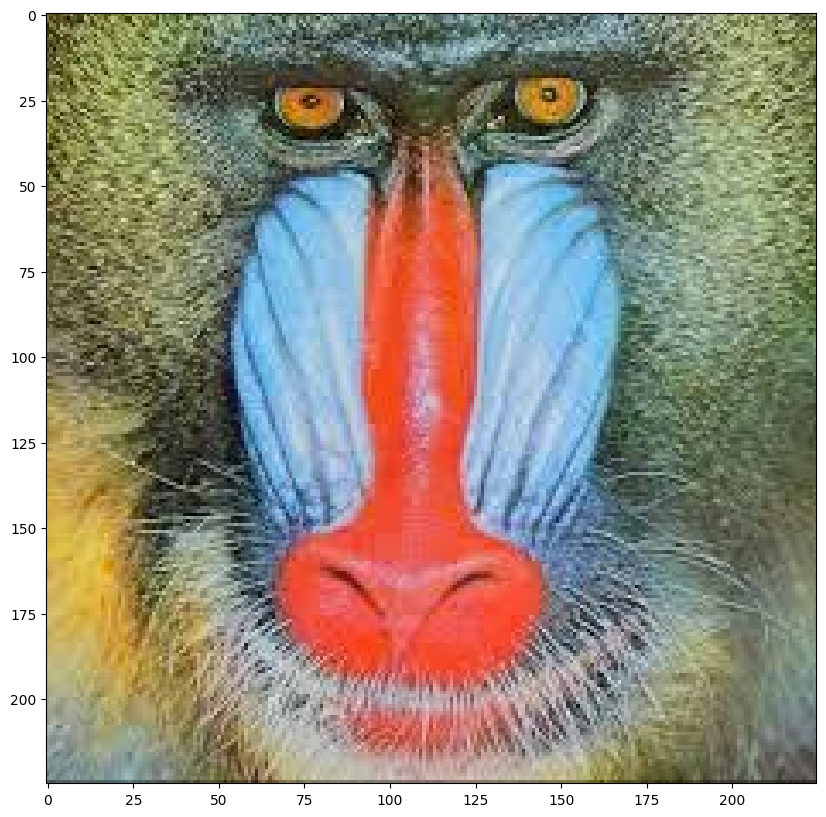

In [67]:
baboon = cv2.imread('baboon.png')        # Đọc ảnh baboon.png bằng OpenCV (mặc định BGR)

plt.figure(figsize=(10,10))              # Tạo khung hiển thị kích thước 10x10
plt.imshow(cv2.cvtColor(baboon, 
                        cv2.COLOR_BGR2RGB))  # Chuyển BGR → RGB để hiển thị đúng màu
plt.show()                               # Hiển thị ảnh ra màn hình


We can obtain the different RGB colors and assign them to the variables <code>blue</code>, <code>green</code>, and <code>red</code>, in (B, G, R) format.


In [68]:
blue, green, red = baboon[:, :, 0], baboon[:, :, 1], baboon[:, :, 2]

We can concatenate each image channel the images using the function <code>vconcat</code>.


In [69]:
im_bgr = cv2.vconcat([blue, green, red])

Plotting the color image next to the red channel in grayscale, we see that regions with red have higher intensity values.


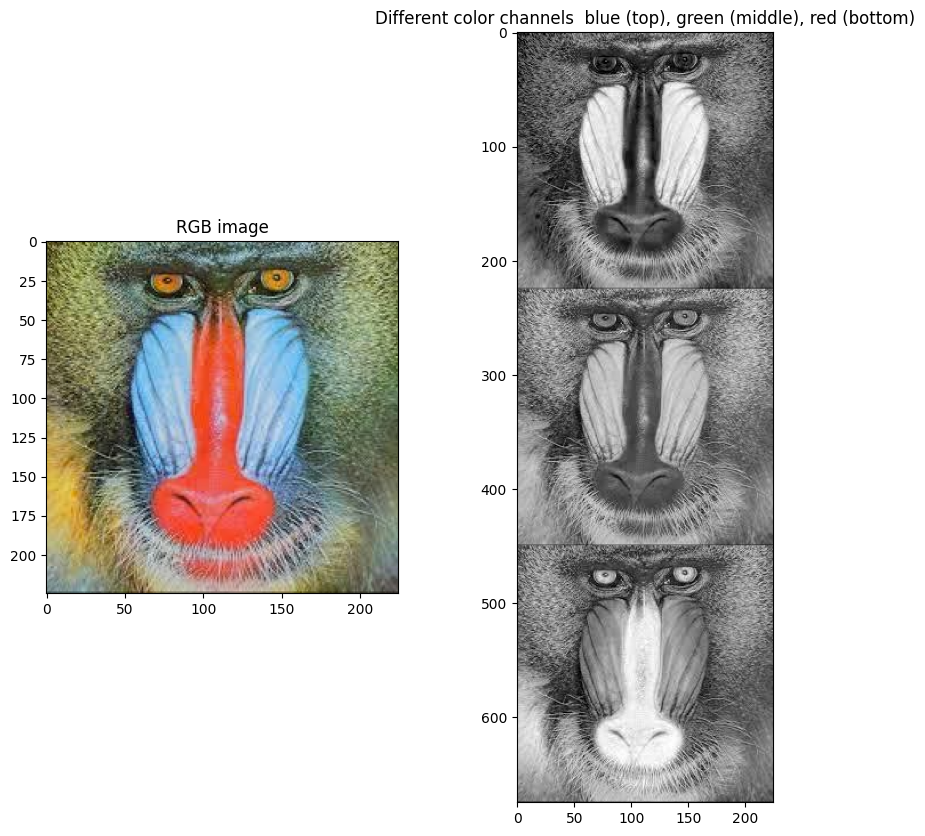

In [70]:
plt.figure(figsize=(10,10))                         # Tạo khung hình lớn 10x10

plt.subplot(121)                                    # Chia khung hình, chọn ô bên trái (1 hàng, 2 cột)
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))# Hiển thị ảnh baboon gốc (BGR → RGB)
plt.title("RGB image")                              # Tiêu đề ảnh bên trái

plt.subplot(122)                                    # Chọn ô bên phải
plt.imshow(im_bgr, cmap='gray')                     # Hiển thị ảnh kênh màu (dưới dạng ảnh xám)
plt.title("Different color channels  blue (top), green (middle), red (bottom)")
                                                    # Tiêu đề ảnh bên phải
plt.show()                                          # Hiển thị toàn bộ hình


### Indexing  


We can use numpy slicing. For example, we can return the first 256 rows corresponding to the top half of the image:


In [71]:
rows = 256

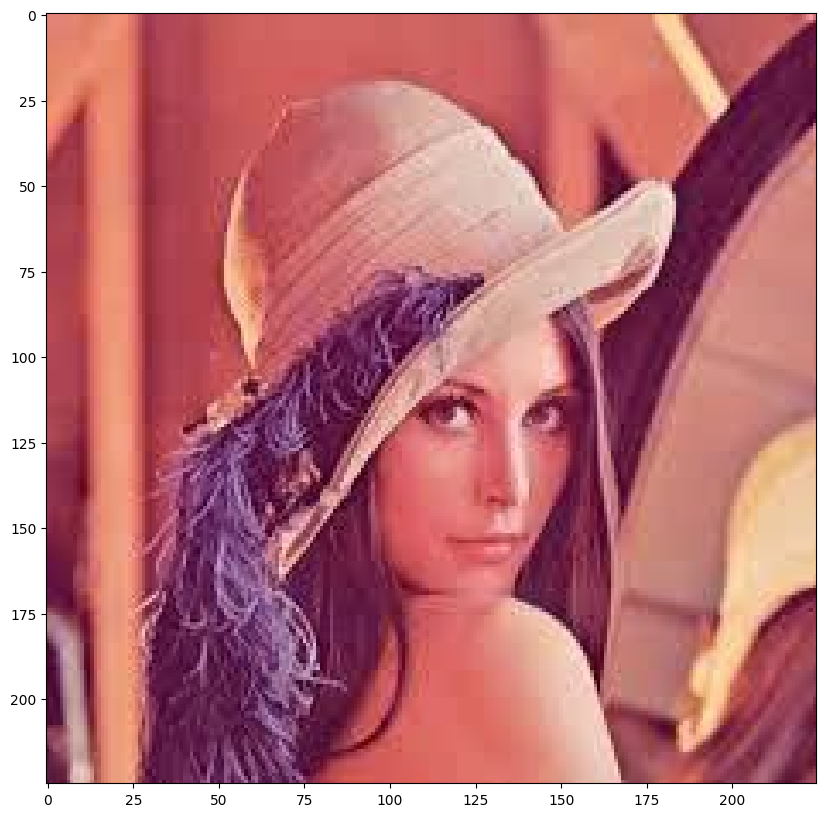

In [72]:
plt.figure(figsize=(10,10))          # Tạo khung hiển thị kích thước 10x10
plt.imshow(new_image[0:rows, :, :])  # Cắt ảnh theo chiều cao (từ hàng 0 đến rows)
plt.show()                           # Hiển thị ảnh


We can also return the first 256 columns corresponding to the first half of the image:


In [73]:
columns = 256

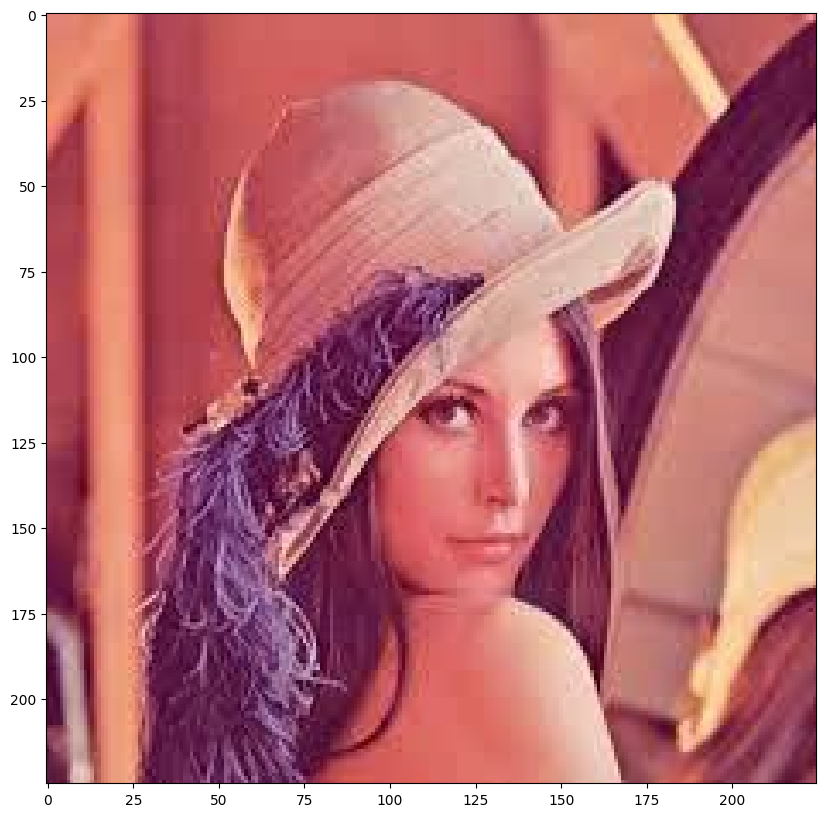

In [74]:
plt.figure(figsize=(10,10))              # Tạo khung hiển thị kích thước 10x10
plt.imshow(new_image[:, 0:columns, :])   # Cắt ảnh theo chiều rộng (từ cột 0 đến columns)
plt.show()                               # Hiển thị ảnh ra màn hình


If you want to reassign an array to another variable, you should use the `copy` method (we will cover this in the next section).


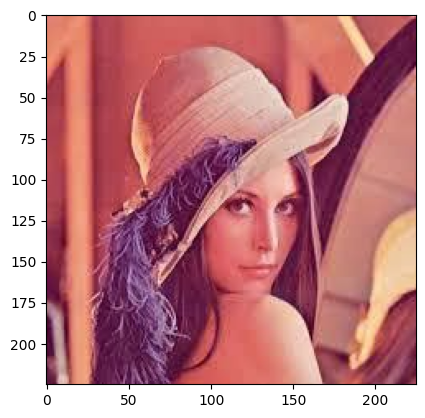

In [75]:
A = new_image.copy()   # Tạo bản sao độc lập của new_image
plt.imshow(A)         # Hiển thị ảnh A
plt.show()            # Hiển thị ra màn hình


If we do not apply the method `copy()`, the variable will point to the same location in memory. Consider the variable `B` below, if we set all values of array `A` to zero, since `A` and `B` points to the same object in the memory, `B` will also have all-zero elements:


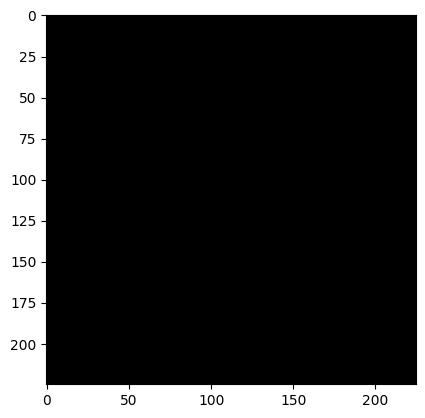

In [76]:
B = A                 # B trỏ tới cùng vùng nhớ với A (không phải bản sao)
A[:, :, :] = 0        # Gán toàn bộ pixel của A = 0 (ảnh đen)
plt.imshow(B)         # Hiển thị B (cũng bị đen theo)
plt.show()            # Hiển thị ra màn hình


We can also manipulate elements using indexing. In the following piece of code, we create a new array `baboon_red` and set all but the red color channels to zero. Therefore, when we display the image, it appears red:


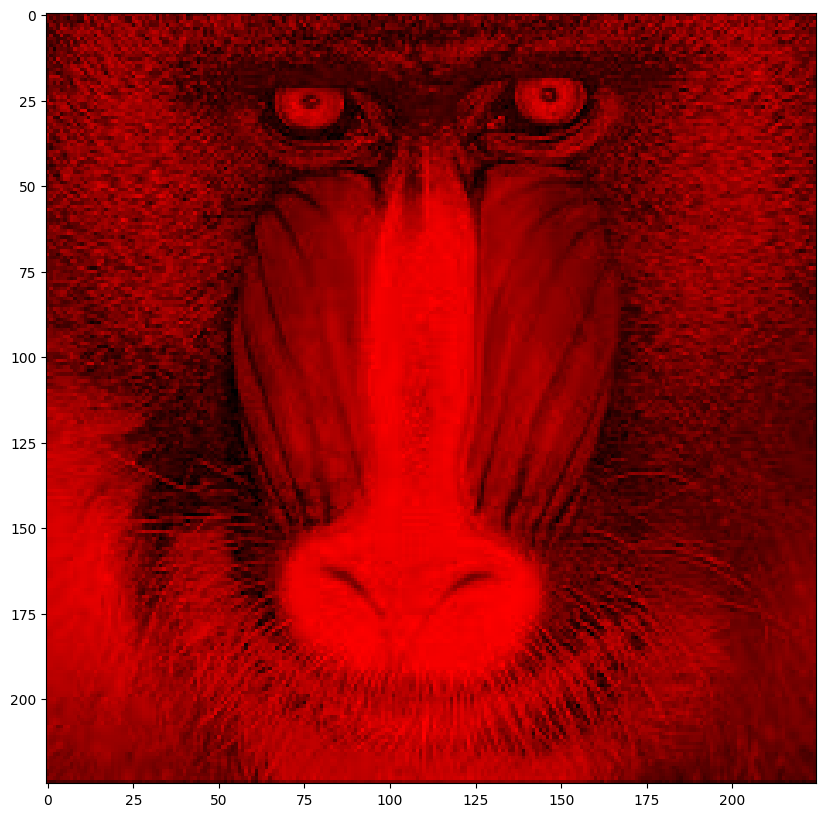

In [77]:
baboon_red = baboon.copy()        # Tạo bản sao ảnh baboon

baboon_red[:, :, 0] = 0          # Đặt kênh Blue = 0 (OpenCV: BGR)
baboon_red[:, :, 1] = 0          # Đặt kênh Green = 0
# → Chỉ giữ lại kênh Red

plt.figure(figsize=(10, 10))     # Tạo khung hiển thị kích thước 10x10
plt.imshow(cv2.cvtColor(baboon_red,
                        cv2.COLOR_BGR2RGB))  # Chuyển BGR → RGB để hiển thị đúng màu
plt.show()                       # Hiển thị ảnh


We can do the same for blue:  


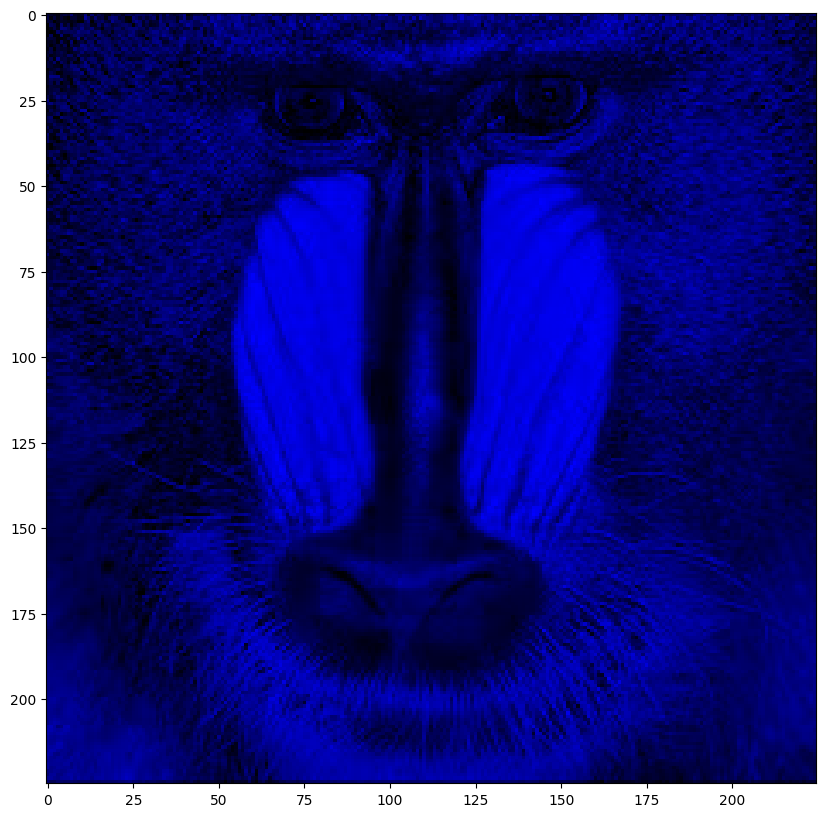

In [78]:
baboon_blue = baboon.copy()        # Tạo bản sao ảnh baboon

baboon_blue[:, :, 1] = 0          # Đặt kênh Green = 0
baboon_blue[:, :, 2] = 0          # Đặt kênh Red = 0
# → Chỉ giữ lại kênh Blue (OpenCV: BGR)

plt.figure(figsize=(10, 10))      # Tạo khung hiển thị kích thước 10x10
plt.imshow(cv2.cvtColor(baboon_blue,
                        cv2.COLOR_BGR2RGB))  # Chuyển BGR → RGB để hiển thị đúng màu
plt.show()                        # Hiển thị ảnh


We can do the same for green:


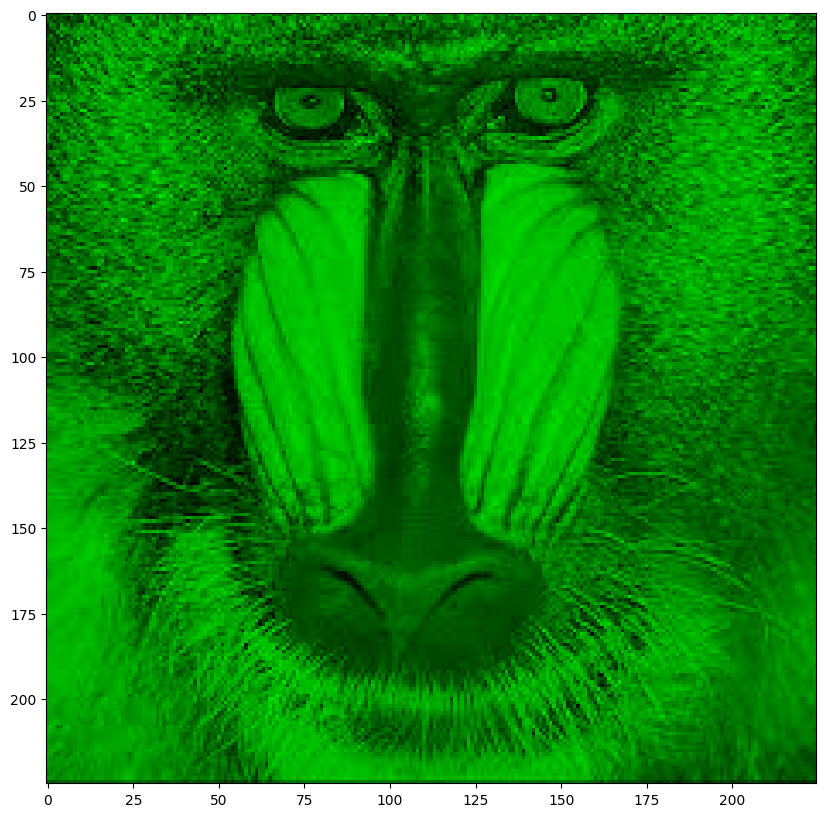

In [79]:
baboon_green = baboon.copy()        # Tạo bản sao ảnh baboon

baboon_green[:, :, 0] = 0          # Đặt kênh Blue = 0 (OpenCV: BGR)
baboon_green[:, :, 2] = 0          # Đặt kênh Red = 0
# → Chỉ giữ lại kênh Green

plt.figure(figsize=(10,10))        # Tạo khung hiển thị 10x10
plt.imshow(cv2.cvtColor(baboon_green, 
                        cv2.COLOR_BGR2RGB))  # Chuyển BGR → RGB để hiển thị đúng màu
plt.show()                         # Hiển thị ảnh


In [80]:
image=cv2.imread('baboon.png')

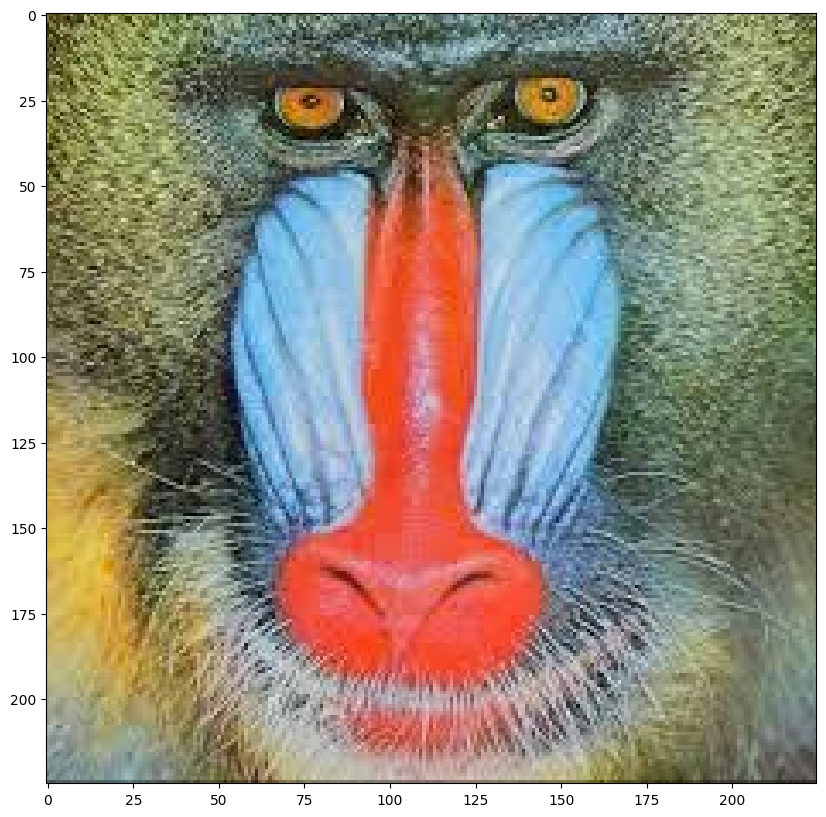

In [81]:
plt.figure(figsize=(10,10))                          # Tạo khung hiển thị kích thước 10x10
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))   # Chuyển ảnh từ BGR sang RGB rồi hiển thị
plt.show()                                           # Hiển thị ảnh ra màn hình


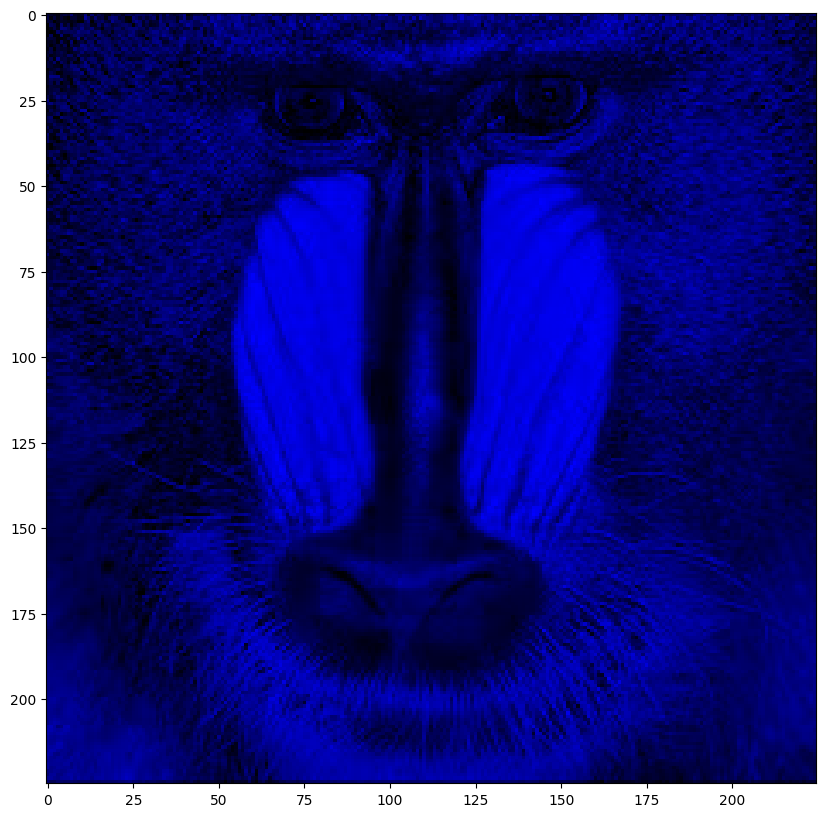

In [82]:
image = cv2.imread('baboon.png')     # Đọc ảnh baboon.png bằng OpenCV (ảnh ở dạng BGR)

baboon_blue = image.copy()           # Tạo bản sao ảnh để không làm thay đổi ảnh gốc

baboon_blue[:, :, 1] = 0             # Đặt kênh Green = 0
baboon_blue[:, :, 2] = 0             # Đặt kênh Red = 0
# → Chỉ giữ lại kênh Blue

plt.figure(figsize=(10,10))          # Tạo khung hiển thị kích thước 10x10
plt.imshow(cv2.cvtColor(baboon_blue, # Chuyển ảnh từ BGR sang RGB
                        cv2.COLOR_BGR2RGB))
plt.show()                           # Hiển thị ảnh ra màn hình


### Question 1: 
Use the image `baboon.png` from this lab or take any image you like.

Open the image and create a OpenCV Image object called `baboon_blue`, convert the image from BGR format to RGB format, get the blue channel out of it, and finally plot the image


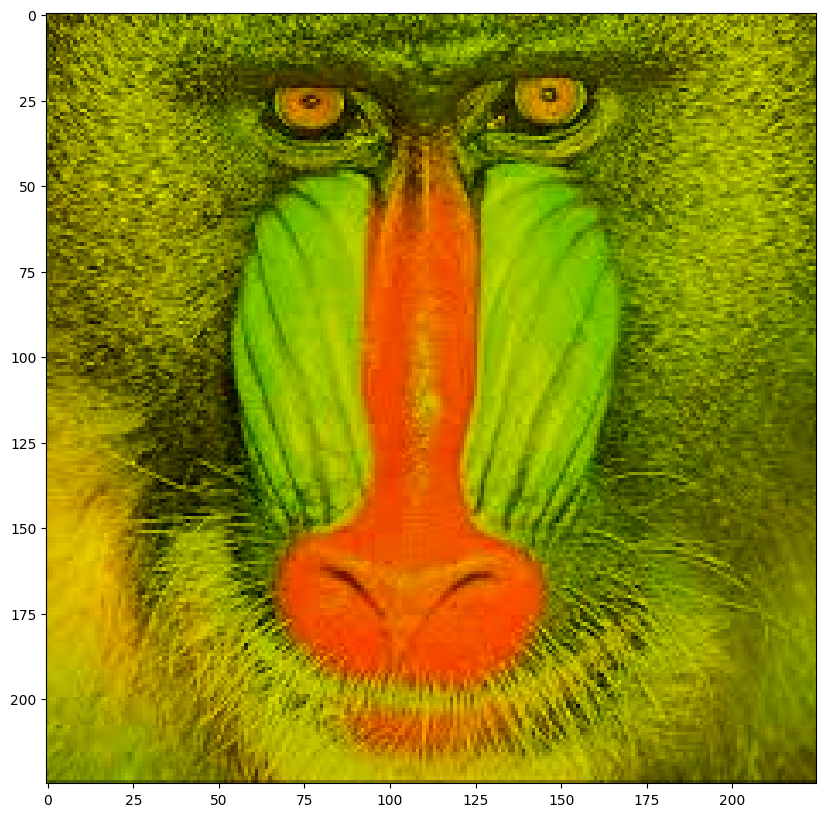

In [83]:
# write your script here
baboon_blue = cv2.imread('baboon.png')          # Đọc ảnh baboon bằng OpenCV (mặc định BGR)
baboon_blue = cv2.cvtColor(baboon_blue, 
                            cv2.COLOR_BGR2RGB) # Chuyển từ BGR sang RGB để hiển thị đúng màu
baboon_blue[:, :, 2] = 0                        # Đặt kênh Blue = 0 (loại bỏ màu xanh dương)

plt.figure(figsize=(10,10))                     # Tạo khung hiển thị 10x10
plt.imshow(baboon_blue)                         # Hiển thị ảnh
plt.show()                                      # Hiện ảnh ra màn hình


Double-click **here** for a hint.

<!-- The hint is below:

baboon_blue[:,:,2] = 0

-->


Double-click **here** for the solution.

<!-- The answer is below:

baboon_blue=cv2.imread('baboon.png')
baboon_blue=cv2.cvtColor(baboon_blue, cv2.COLOR_BGR2RGB)
baboon_blue[:,:,2] = 0
plt.figure(figsize=(10,10))
plt.imshow(baboon_blue)
plt.show()

-->


So sánh thư viện PIL (Pillow) và OpenCV (cv2)

PIL (Pillow) và OpenCV (cv2) đều là các thư viện dùng để xử lý ảnh trong Python nhưng phục vụ những mục đích khác nhau.

PIL (Pillow) là thư viện xử lý ảnh cơ bản, dễ học và dễ sử dụng. Ảnh trong PIL được biểu diễn dưới dạng đối tượng PIL.Image.Image, phù hợp cho các thao tác đơn giản như mở ảnh, lưu ảnh, chuyển ảnh sang xám, cắt ảnh hoặc ghép ảnh. PIL sử dụng hệ màu RGB nên khi hiển thị ảnh bằng matplotlib có thể hiển thị trực tiếp mà không cần chuyển đổi. Tuy nhiên, tốc độ xử lý của PIL không cao và khả năng xử lý ảnh nâng cao còn hạn chế.

OpenCV (cv2) là thư viện mạnh chuyên dùng cho xử lý ảnh và thị giác máy tính (Computer Vision). Ảnh trong OpenCV được lưu trực tiếp dưới dạng mảng NumPy (numpy.ndarray), do đó rất thuận tiện cho việc tính toán và xử lý pixel. OpenCV sử dụng hệ màu BGR, vì vậy khi hiển thị ảnh bằng matplotlib cần chuyển đổi từ BGR sang RGB để tránh sai màu. OpenCV có tốc độ xử lý nhanh, hỗ trợ nhiều thuật toán nâng cao như lọc ảnh, phát hiện cạnh, nhận diện khuôn mặt và ứng dụng trong AI.

Tóm lại, PIL phù hợp cho người mới học và các bài toán xử lý ảnh đơn giản, trong khi OpenCV phù hợp cho các bài toán phức tạp, yêu cầu hiệu năng cao và ứng dụng trong Computer Vision.

# References 


[1]  Images were taken from: https://homepages.cae.wisc.edu/~ece533/images/
    
[2]  <a href='https://pillow.readthedocs.io/en/stable/index.html'>Pillow Docs</a>

[3]  <a href='https://opencv.org/'>Open CV</a>

[4] Gonzalez, Rafael C., and Richard E. Woods. "Digital image processing." (2017).


<!--<h2>Change Log</h2>-->


<!--
<table>
    <tr>
        <th>Date (YYYY-MM-DD)</th>
        <th>Version</th>
        <th>Changed By</th>
        <th>Change Description</th>
    </tr>
    <tr>
        <td>2020-07-20</td>
        <td>0.2</td>
        <td>Azim</td>
        <td>Modified Multiple Areas</td>
    </tr>
    <tr>
        <td>2020-07-17</td>
        <td>0.1</td>
        <td>Azim</td>
        <td>Created Lab Template</td>
    </tr>
    <tr>
        <td>2021-03-06</td>
        <td>0.3</td>
        <td>Nayef</td>
        <td>Modified some codes</td>
    </tr>
</table>
-->
